In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
import regex as reg

%matplotlib inline  

Extracting references from texts:

In [ ]:
!python ./Scripts/reference_extraction.py 

Loading references as previously extracted:

In [2]:
references = pd.read_csv('data/References.csv', index_col=0)

In [3]:
references.head()

,ref,file,ref_parsed,year,identifier
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


Some sample references, and their corresponding identifier:

In [8]:
sample = references[['ref', 'identifier']].sample(4)
_ = [print("Ref: ",r, '\nIdentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

Ref:  Bagley, E. (2010). The epistemography of an urban and regional planning practicum: Appropriation in the face of resistance. WCER Working Paper 2010-8. Wisconsin Center for Education Research, University of Wisconsin-Madison. 
Identifier:  Bagley, E. (2010). The epistemography of an urban and regional planning practicum: Appropriation in the face of resistance
Ref:  Dyckhoff, A. L., Zielke, D., Bültmann, M., Chatti, M. A., & Schroeder, U. (2012). Design and Implementation of a Learning Analytics Toolkit for Teachers. J of Educational Technology & Society, 15(3), 58-76. 
Identifier:  Dyckhoff, A. L., Zielke, D., Bültmann, M., Chatti, M. A., & Schroeder, U. (2012). Design and Implementation of a Learning Analytics Toolkit for Teachers
Ref:  Housen, A. C. (2002). Aesthetic thought, critical thinking and transfer. Arts and Learning Research, 18(1), 20012002. 
Identifier:  Housen, A. C. (2002). Aesthetic thought, critical thinking and transfer
Ref:  Brown, A. (1992). Design experiments

### First we check the most cited citations:

Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge                                   32
Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation                                          32
Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice                                             31
Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology                                   23
Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas                                                         20
Barron, B. (2003). When smart groups fail                                                                                      19
Bereiter, C. (2002). Education and mind in the knowledge age                                                                   16
Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes

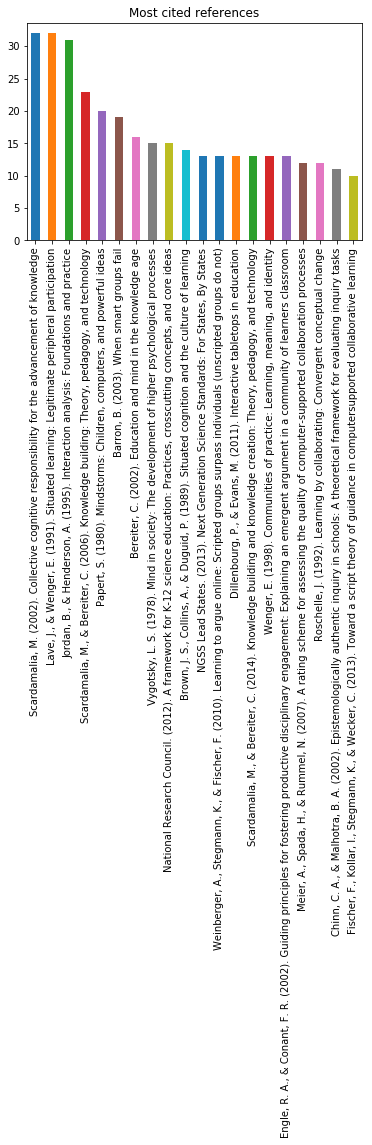

In [9]:
plt.title('Most cited references')
references.identifier.value_counts().head(20).plot(kind='bar')
references.identifier.value_counts().head(10)

### We look at how the references are distributed over the years:

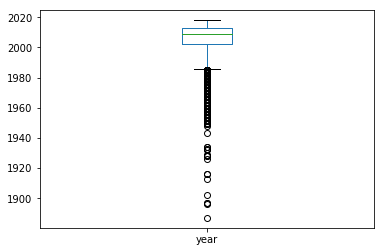

In [10]:
references.year.plot(kind='box')

### Looking at authors in dataset & the ones they reference

Load the metadata:

In [11]:
metadata = pd.read_csv('data/Parsed_metadata.csv', index_col=0)

In [12]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)
reference_authors.shape

(45194, 6)

In [13]:
reference_authors.drop_duplicates(inplace=True)
reference_authors.shape

(34634, 6)

In [14]:
reference_authors.head()

,ref,file,ref_parsed,year,identifier,author
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...",Lave J.
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",Miles M. B.
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",Pea R. D.
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...",Rogoff B.
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",Shirk J.


We check the most cited author:

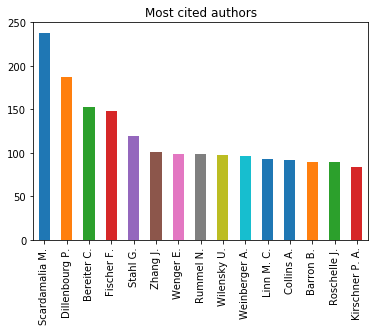

In [15]:
plt.title('Most cited authors')
reference_authors.author.value_counts().head(15).plot(kind='bar')

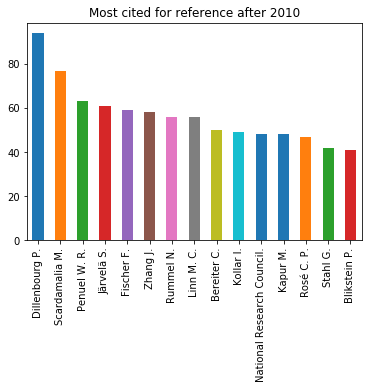

In [16]:
plt.title('Most cited for reference after 2010')
reference_authors[reference_authors.year > 2010].author.value_counts().head(15).plot(kind='bar')

We now merge on the shortened name as it can be found in the citation.

**Note** that we might get illegitemate merges, as the short name is not unique, even within the metadata dataset!

In [17]:
reference_edges = pd.merge(metadata, reference_authors, on='file')

reference_edges.sample(2)

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,...,abstract,long_name,author_order,shortend_names,identifier_x,ref,ref_parsed,year,identifier_y,author
15641,import2015full_221,"['tangible systems', 'emergent dialogue', 'stu...",en,https://doi.dx.org/10.22318/cscl2015.221,Book chapter,International Society of the Learning Science...,What Kind of World Do You Want to Live In? Pos...,2015-07,2017-06-19 14:15:51+00:00,"Wise, A. F., Antle, A. N., Warren, J., May, A....",...,Twenty pairs of 5th grade children used a tang...,"Warren, Jillian",2,Antle A. N.,"Wise, A. F., Antle, A. N., Warren, J., May, A....","Speelpenning, T., Antle, A. N., Doering, T., &...","Speelpenning, T., Antle, A. N., Doering, T., &...",2011.0,"Speelpenning, T., Antle, A. N., Doering, T., &...",Hoven E.
53775,import2015short_1110,"['learning communities', 'networked society', ...",en,https://doi.dx.org/10.22318/cscl2015.1110,Book chapter,International Society of the Learning Science...,Technology-Enhanced Learning Communities on a ...,2015-07,2017-06-19 14:51:54+00:00,"Kali, Y., Tabak, I., Ben-Zvi, D., Kidron, A., ...",...,This symposium brings together the theoretical...,"Ben-Zvi, Dani",2,Tabak I.,"Kali, Y., Tabak, I., Ben-Zvi, D., Kidron, A., ...","Elias, N., & Lemish, D. (2009). Spinning the W...","Elias, N., & Lemish, D. (2009)",2009.0,"Elias, N., & Lemish, D. (2009). Spinning the W...",Elias N.


In [18]:
reference_edges.rename(columns={'shortend_names': 'author', 'author': 'cited'}, inplace=True)

#### Self citations:

In [19]:
reference_edges[reference_edges.author == reference_edges.cited].author.value_counts().head()

Zhang J.           80
Rummel N.          61
Trausan-Matu S.    50
Sharma K.          35
Kollar I.          27
Name: author, dtype: int64

### Number of authors in and out of conference

In and out of conference citations, quick calculation:

In [20]:
print('Number of distinct authors ', len(reference_edges.author.unique()))
print('Number of distinct cited authors by some author in the conference ', len(reference_edges.cited.unique()))
print('Number of authors that where cited by an other author in the confernce :' , len(set(reference_edges.cited.tolist()).intersection(set(reference_edges.author.tolist()))))

Number of distinct authors  1444
Number of distinct cited authors by some author in the conference  13224
Number of authors that where cited by an other author in the confernce : 806


In [21]:
reference_edges = reference_edges[['cited', 'author', 'year', 'ref']][reference_edges.year.notna()]

Example of how one can match the string:

In [387]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| )Supported Collaborative Learning'
re.search(match_conference,'bjfejf ICLS')

<re.Match object; span=(7, 11), match='ICLS'>

Find references belong to conference:

In [388]:
mask_c_s = reference_edges.ref.map(lambda x: True if re.search(match_conference, x) else False)

In [389]:
in_conference = set(reference_edges[mask_c_s].cited.unique())

We limit the range of years to get people that are still "active"

In [390]:
not_in_conference = list(set(reference_edges[reference_edges.year > 2010].cited) - in_conference.union(set(reference_edges.author)))

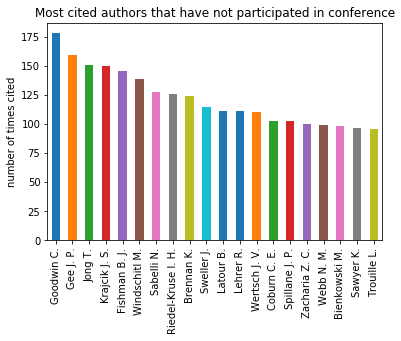

In [411]:
#todo: filter out organisations
# todo: deal with non overlapping names
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_edges.dropna().cited.map(lambda x: True if reg.search(r'\p{Lu}\.',x) else False)
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (is_human)].cited.value_counts().head(20).plot(kind = 'bar')

In [30]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Goodwin C.')].ref.sample(4).tolist()

['Koschmann, T., LeBaron, C., Goodwin, C., & Feltovich, P. (2011). “Can you see the cystic artery yet?” A simple matter of trust. Journal of Pragmatics, 43(2), 521–541.',
 'Goodwin, C. (2013). The co-operative, transformative organization of human action and knowledge. Journal of Pragmatics 46, 8-23.',
 'Streeck, J., Goodwin, C., & LeBaron, C. D. (Eds.). (2011). Embodied interaction\u2009\u202f: language and body in the material world. New York: Cambridge University Press.',
 'Goodwin, C. (2007). Participation, stance and affect in the organization of activities. Discourse & Society, 18(1, Special issue: Morality as family practice), 53–73.']

In [31]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Gee J. P.')].ref.sample(4).tolist()

['Gee, J. P. (2007). Good videogames and good learning: Collected essays on video games. New York, NY: Peter Lang Publishing.',
 'Gee, J. P. (2003). What video games have to teach us about learning and literacy. New York: Palgrave/Macmillan.',
 'Gee, J. P. (2001). Identity as an Analytic Lens for Research in Education. Review of Educational Research, 25, 99–125.',
 'Gee, J. P. (2007). Good videogames and good learning: Collected essays on video games. New York, NY: Peter Lang Publishing.']

# extract conference, journal etc:

Example of how we can split up the text, which is later used to extract the conference/journal if present:

In [260]:
text = references.sample().ref.item()
split_ref = r'(\.|\?) (?=[\p{Lu}][\p{L}])'
reg.split(split_ref, text)

['Potter, J. (2005)',
 '.',
 'Making psychology relevant',
 '.',
 'Discourse & Society, 16(5), 739-747.']

We now define a regex that will catch up on words indicating a relation to a conference

TODO: include symposium or not?

In [114]:
#regex to find journals or conferences
pub = '(C|c)onference|(P|p)roceedings|(j|J)ournal|(T|t)ransactions|(s|S)ymposium'
re.search(pub, text)

In [133]:
#set to lower for better matching
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| )Supported Collaborative Learning'
match_conference.lower()

' jls |journal of the learning sciences|cscl|icls|ijcscl|computer(-| )supported collaborative learning'

In [134]:
re.search(match_conference.lower(), clean_string('international journal of computer-supported collaborative learning'))

<re.Match object; span=(25, 66), match='computer-supported collaborative learning'>

In [135]:
clean_string('international journal of computer-supported collaborative learning')

'international journal of computer-supported collaborative learning'

In [427]:
def clean_string(x):
    
    x = x.lower() # lower to ignore case
    
    x = re.sub('[\'\"\”\/\d]*', '', x) #sub out elements that might cause same string to be diff
    x = re.sub(' & ', ' and ', x) # common spelling issue
    x = re.sub(' th | nd | rd | st | volume |— |  ', ' ', x)
    x = re.sub(' on ', ' of ', x)
    x = x.strip()
    x = ' '.join([ z for z,y in nltk.pos_tag(word_tokenize(x)) if not y in ['CD', ':','$' ]])
    return x

mask = references.ref.map(lambda x: True if 
                          (re.search(pub, x) and not
                          re.search(match_conference.lower(), clean_string(x))) else False)

In [428]:
sources = references[mask].ref.map(lambda x: 
                            [y for y in reg.split(split_ref, x) 
                             if re.search(pub, y)
                            ][0])

In [429]:
sources.shape

(3292,)

## Is this CSCL ?

In [430]:
sources[14589]

'In The first international conference on Computer support for collaborative learning (pp. 67-74). L'

In [431]:
sources = sources.map(lambda x: clean_string(x))

In [432]:
sources.sample(10).tolist()

['in proceedings of the international conference of software engineering ( pp . )',
 'journal of computers and mathematics and science teaching , ( ) , .',
 'acm transactions of computing education ( toce ) , ( ) , – .',
 'journal of research in science teaching , , – .',
 'canadian journal of learning and technology , ( ) .',
 'journal of adolescent and adult literacy , ( ) .',
 'the modern language journal , ( ) , – .',
 'journal of computer assisted learning , ( ) , .',
 'international journal of educational research , ( ) , – .',
 'journal of artificial societies and social simulation , ( ) , .']

In [433]:
def strip_garbage(s):
    r = [y.strip() for y in reg.split(r'\.|\,|\?|\;|\(|\)', s) if re.search(pub.lower(), y)]
    if len(r) > 0:
        return r[0]
    else:
        print(s)
        return None

In [434]:
sources = sources.map(lambda x: strip_garbage(x))#.map(lambda x: x[0] if len(x) > 0 else )

People like to misspell CSCL spell it in various forms..

## Most cited non  CSCL and ISCL conferences:

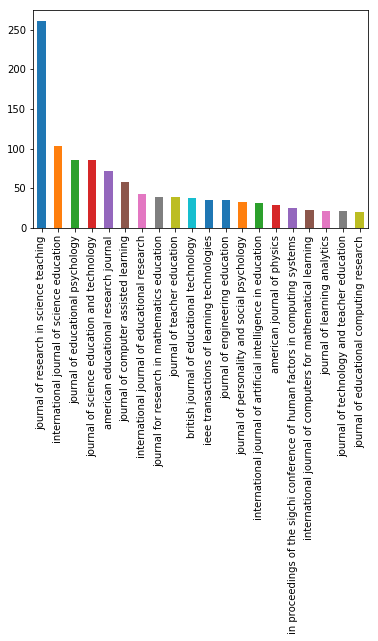

In [435]:
sources.value_counts().head(20).plot(kind='bar')

In [436]:
sources.value_counts().shape

(1149,)

Use this: https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms

## Try to make individual conference stop list:

In [145]:
import nltk
from nltk import word_tokenize

In [367]:
nltk.pos_tag(['in', 'the', 'first'], tagset='universal')

[('in', 'ADP'), ('the', 'DET'), ('first', 'ADJ')]

In [147]:
from collections import Counter

In [437]:
all_words = []
all_tags = []

for sentence in sources:
    s = word_tokenize(sentence)
    all_words += s
    all_tags += [ y for x,y in nltk.pos_tag(s)]

In [164]:
' '.join([ x for x,y in nltk.pos_tag(word_tokenize(sentence)) if y not in ['CD', ':','$' ]])

'journal of research in science teaching'

In [438]:
dict_all_words = dict((x,all_words.count(x)) for x in set(all_words))

In [439]:
word_df = pd.DataFrame([all_words,all_tags]).T
word_df.columns = ['word', 'tag']

In [440]:
word_df.tag.value_counts()

NN      8581
IN      4888
JJ      3284
NNS     1855
DT      1059
CC       660
VBG      421
VBN      184
VBD       65
NNP       26
VBP       24
FW        19
JJR       15
TO        13
VB        12
VBZ       10
RB         5
PRP$       5
PRP        4
.          1
WDT        1
MD         1
CD         1
Name: tag, dtype: int64

In [441]:
word_df[word_df.tag == 'NN'].word.value_counts()

journal            2221
education           834
conference          691
research            631
science             603
learning            337
technology          308
teaching            290
psychology          245
computer            149
engineering          86
teacher              86
paper                77
society              75
symposium            74
interaction          73
knowledge            62
design               60
intelligence         57
work                 42
acm                  41
personality          39
computing            38
association          36
information          33
mining               29
’                    29
group                25
school               25
communication        25
                   ... 
peer                  1
winter                1
personalization       1
groupware             1
modelling             1
sigir                 1
sciences-volume       1
tangible              1
haikkarainen          1
art                   1
convergence     

In [180]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [173]:
import difflib
difflib.SequenceMatcher(None, 'hello', 'hello').ratio()

1.0

In [174]:
d = {}

In [175]:
for i, row in enumerate(sources.unique()):
    for j, row_2 in enumerate(sources.unique()):
        if i > j and row != row_2:
            difference = difflib.SequenceMatcher(None, row, row_2).ratio()
            if difference > 0.9:
                if row in d.keys():
                    d[row].append(row_2)
                else:
                    d[row] = [row_2]

In [176]:
len(d)

344

In [178]:
d

{'10th european conference of technology enhanced learning': ['in european conference of technology enhanced learning',
  'euroopean conference of technology enhanced learning'],
 '12th international conference of the learning sciences': ['fourth international conference of the learning sciences',
  'of international conference of learning sciences',
  'international conference of the learning sciences',
  'in fourth international conference of the learning sciences',
  'in international conference of the learning sciences',
  'international conference of learning sciences'],
 '1845 international journal artificial intelligence education': ['international journal of artificial intelligence in education'],
 '2013 46th hawaii international conference of': ['2010 43rd hawaii international conference of'],
 '2015 international conference of': ['international conference of',
  '2013 5th international conference of'],
 '22 nd international conference of computers in education': ['25th intern

## Exploring a way to extract better strings

In [9]:
a = ['in', 'proceedings', 'of', '21st', 'aaai']
b = ['in', 'proceedings', 'of', '1st', 'aaai']

In [10]:
i = set(a).intersection(set(b))

In [11]:
#for sentences that have extra words, does not work with alternate spelling
#-> do lemmatisation first

In [12]:
[elem for elem in b if elem in i]

['in', 'proceedings', 'of', 'aaai']

In [ ]:
sources